In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import requests
import re

Loading in all files with discharge data. Numbers in file name correspond to catchment number given by NVE.

In [2]:
dirl  = "Final_dataset/"
files = os.listdir(dirl)
files=np.sort(files)
files_txt = [i for i in files if i.endswith('.txt_')]
files_txt = [i[:-5] for i in files if i.endswith('.txt_')]
files_txt.sort(key=int)
print(files_txt)

['200013', '200032', '200142', '200268', '200279', '200284', '200290', '200303', '200323', '600010', '1200070', '1200171', '1200178', '1200193', '1500049', '1600066', '1600075', '1800010', '1800011', '1900079', '1900080', '1900082', '1900096', '1900104', '2000002', '2000011', '2200016', '2400008', '2400009', '2500024', '2600020', '2600021', '3600013', '4100001', '4100008', '4200002', '4800005', '5000001', '5000013', '5500004', '6200005', '6200010', '6200014', '6200015', '7500023', '7500028', '7600005', '7800008', '7900003', '8000004', '8100001', '8200004', '8300002', '8300006', '8300007', '8300012', '8400011', '8400020', '8500004', '8600010', '8600012', '8700010', '8800004', '8800011', '9100002', '9700001', '9800004', '10100001', '10400022', '10400023', '10500001', '10900009', '11200008', '12200011', '12300031', '12400002', '12700006', '12700011', '12700013', '12800005', '13300007', '13800001', '13900020', '13900026', '13900035', '14000002', '14800002', '15100015', '15200004', '1530000

Removing one file and adding it to the end, so the order of stations match with snow and evaporation data.

In [3]:
files_txt.remove('5000013')
files_txt.remove('20000004')
len(files_txt)

122

In [4]:
files_txt.append('20000004')
len(files_txt)

123

See if length of file list is correct

In [6]:
len(files_txt)

123

Making a dataframe to store all discharge data. Starting with one to set up the dataframe properly.

In [7]:
df = pd.read_csv(dirl+files_txt[0]+'.txt_',skiprows=0,header=None,index_col=0,sep=' ',na_values=-9999)
df.columns=[files_txt[0]]
df

,200013
0,
19310101/1200,3.439667
19310102/1200,3.335541
19310103/1200,3.233237
19310104/1200,3.233237
19310105/1200,3.233237
...,...
20220128/1200,2.986215
20220129/1200,2.962115
20220130/1200,2.961524


Make sure datetime format is correct, and that pandas recognizes it as datetime

In [8]:
df['date'] = pd.to_datetime(df.index)
df['date new'] = df['date'].dt.date

df.index=df['date new']
df.drop('date new', 1, inplace=True)
df.drop('date', 1, inplace=True)
df

,200013
date new,
1931-01-01,3.439667
1931-01-02,3.335541
1931-01-03,3.233237
1931-01-04,3.233237
1931-01-05,3.233237
...,...
2022-01-28,2.986215
2022-01-29,2.962115
2022-01-30,2.961524


Adding the rest of the files to the dataframe. Now a dataframe with 123 columns.

In [9]:
for i in range(1, 123):  
    if files_txt[i] in from_k:
        df1 = pd.read_csv(dirl+files_txt[i]+'.txt_',skiprows=0,header=None,index_col=0,sep=' ',na_values=-9999)
        df1.columns=[files_txt[i]]
        df1['date'] = pd.to_datetime(df1.index, format='%Y%m%d/%H%M')
        df1['date new'] = df1['date'].dt.date

        df1.index=df1['date new']
        df1.drop('date new', 1, inplace=True)
        df1.drop('date', 1, inplace=True)
    
    else:
        df1 = pd.read_csv(dirl+files_txt[i]+'.txt_',skiprows=1,header=None,index_col=0,sep=',',na_values=-9999)
        df1['date'] = pd.to_datetime(df1.index)
        df1['date new'] = df1['date'].dt.date

        df1.index=df1['date new']
        df1.drop('date new', 1, inplace=True)
        df1.drop('date', 1, inplace=True)
    
    df[files_txt[i]] = df1
df

,200013,200032,200142,200268,200279,200284,200290,200303,200323,600010,...,24400002,24600009,24700003,30700005,30700007,30800001,31100004,31100460,31300010,20000004
date new,,,,,,,,,,,,,,,,,,,,,
1931-01-01,3.439667,3.954662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.885412,NaN,NaN,NaN,NaN,3.435097,NaN,NaN
1931-01-02,3.335541,3.954662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.812091,NaN,NaN,NaN,NaN,3.435097,NaN,NaN
1931-01-03,3.233237,3.954662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.812091,NaN,NaN,NaN,NaN,3.435097,NaN,NaN
1931-01-04,3.233237,3.954662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.812091,NaN,NaN,NaN,NaN,3.435097,NaN,NaN
1931-01-05,3.233237,3.954662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.812091,NaN,NaN,NaN,NaN,3.435097,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,2.986215,3.452328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.095973,NaN,NaN,NaN,NaN,3.112891,NaN,9.637750
2022-01-29,2.962115,3.375115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.111343,NaN,NaN,NaN,NaN,3.181705,NaN,8.803946
2022-01-30,2.961524,3.357174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.112716,NaN,NaN,NaN,NaN,3.202374,NaN,8.106083


Setting up our research period in new dataframe

In [11]:
startdate = pd.to_datetime("1991-01-01").date()
enddate = pd.to_datetime("2019-12-31").date()
myperiod= df.loc[startdate:enddate]
myperiod

,200013,200032,200142,200268,200279,200284,200290,200303,200323,600010,...,24400002,24600009,24700003,30700005,30700007,30800001,31100004,31100460,31300010,20000004
date new,,,,,,,,,,,,,,,,,,,,,
1991-01-01,2.795052,3.053194,9.621333,2.000331,4.108821,4.467416,1.935237,1.082839,0.319583,0.102758,...,6.527214,0.579495,0.282790,6.634914,0.733110,5.506664,14.98188,2.576769,4.677601,5.641482
1991-01-02,2.854732,3.214535,9.621333,2.000331,4.108821,2.749956,1.622203,1.082839,0.284832,0.090546,...,6.527214,0.572862,0.282790,6.355210,0.680334,5.197927,14.27803,2.576769,4.364050,5.155174
1991-01-03,2.875765,3.214535,9.967710,1.930021,4.108821,2.572324,1.826975,1.003368,0.284832,0.079903,...,6.527214,0.566253,0.282790,6.083414,0.680334,5.197927,14.27803,2.576769,4.519073,4.922876
1991-01-04,2.873423,3.214535,9.283694,1.930021,3.961670,2.239984,2.047500,1.003368,0.268351,0.069260,...,6.527214,0.559624,0.282790,6.083414,0.680334,5.197927,13.58921,2.576769,4.519073,4.697669
1991-01-05,2.883969,3.214535,9.283694,1.930021,3.817414,2.084954,2.047500,0.927627,0.268351,0.069260,...,6.121602,0.552996,0.282790,5.819415,0.629262,4.902205,13.58921,2.576769,4.519073,4.697669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,3.011080,4.641807,15.779950,2.243959,6.864639,1.516901,1.352000,2.047381,0.098000,0.156079,...,10.827000,0.950598,0.762000,3.144829,0.364691,4.619723,13.62838,4.152596,7.626657,2.661582
2019-12-28,2.953661,4.484441,17.429760,2.183034,7.037039,1.392138,1.327000,2.108634,0.087000,0.146048,...,10.795000,0.944577,0.758000,3.076712,0.388712,4.450317,13.41961,4.097032,7.059440,2.582588
2019-12-29,2.890424,4.347021,19.428360,2.477534,8.307080,1.307090,1.449000,1.976022,0.078000,0.195357,...,10.763000,0.932600,0.754000,3.344431,0.771899,4.674153,13.51162,4.079292,6.999042,3.361492


Making sure the index is recognized as datetime

In [12]:
myperiod['Datetime'] = pd.to_datetime(myperiod.index, format='%Y-%m-%d')
myperiod = myperiod.set_index('Datetime')
myperiod

/Users/mac/anaconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,200013,200032,200142,200268,200279,200284,200290,200303,200323,600010,...,24400002,24600009,24700003,30700005,30700007,30800001,31100004,31100460,31300010,20000004
Datetime,,,,,,,,,,,,,,,,,,,,,
1991-01-01,2.795052,3.053194,9.621333,2.000331,4.108821,4.467416,1.935237,1.082839,0.319583,0.102758,...,6.527214,0.579495,0.282790,6.634914,0.733110,5.506664,14.98188,2.576769,4.677601,5.641482
1991-01-02,2.854732,3.214535,9.621333,2.000331,4.108821,2.749956,1.622203,1.082839,0.284832,0.090546,...,6.527214,0.572862,0.282790,6.355210,0.680334,5.197927,14.27803,2.576769,4.364050,5.155174
1991-01-03,2.875765,3.214535,9.967710,1.930021,4.108821,2.572324,1.826975,1.003368,0.284832,0.079903,...,6.527214,0.566253,0.282790,6.083414,0.680334,5.197927,14.27803,2.576769,4.519073,4.922876
1991-01-04,2.873423,3.214535,9.283694,1.930021,3.961670,2.239984,2.047500,1.003368,0.268351,0.069260,...,6.527214,0.559624,0.282790,6.083414,0.680334,5.197927,13.58921,2.576769,4.519073,4.697669
1991-01-05,2.883969,3.214535,9.283694,1.930021,3.817414,2.084954,2.047500,0.927627,0.268351,0.069260,...,6.121602,0.552996,0.282790,5.819415,0.629262,4.902205,13.58921,2.576769,4.519073,4.697669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,3.011080,4.641807,15.779950,2.243959,6.864639,1.516901,1.352000,2.047381,0.098000,0.156079,...,10.827000,0.950598,0.762000,3.144829,0.364691,4.619723,13.62838,4.152596,7.626657,2.661582
2019-12-28,2.953661,4.484441,17.429760,2.183034,7.037039,1.392138,1.327000,2.108634,0.087000,0.146048,...,10.795000,0.944577,0.758000,3.076712,0.388712,4.450317,13.41961,4.097032,7.059440,2.582588
2019-12-29,2.890424,4.347021,19.428360,2.477534,8.307080,1.307090,1.449000,1.976022,0.078000,0.195357,...,10.763000,0.932600,0.754000,3.344431,0.771899,4.674153,13.51162,4.079292,6.999042,3.361492


Calculate the 5% and 95% exceedance frequencies for each catchment.

In [13]:
q_95 = []
q_5 = []

for i in files_txt:
    fdc_sort = myperiod[i].sort_values()
    percentile95 = np.percentile(fdc_sort, 5)
    percentile5 = np.percentile(fdc_sort, 95)
    q_95.append(percentile95)
    q_5.append(percentile5)

Calculate the yearly mean discharge value in each catchment.

In [14]:
ym = myperiod.resample("y").mean()
ym

,200013,200032,200142,200268,200279,200284,200290,200303,200323,600010,...,24400002,24600009,24700003,30700005,30700007,30800001,31100004,31100460,31300010,20000004
Datetime,,,,,,,,,,,,,,,,,,,,,
1991-12-31,14.384557,7.827389,22.470151,18.906632,9.086278,7.843655,8.344910,7.636847,0.829331,0.123561,...,29.625075,2.580721,1.929902,7.534017,2.458355,12.045108,18.278218,5.949131,4.251363,8.457646
1992-12-31,19.192906,8.840548,19.707586,24.076449,5.825557,11.510064,11.821661,11.032707,0.854791,0.131015,...,53.174579,3.864642,2.728510,9.711608,2.938387,17.888725,22.884169,6.479633,4.007089,7.910095
1993-12-31,17.318921,9.823891,22.552835,22.593605,6.379659,12.023153,10.081505,10.788193,0.812630,0.130535,...,35.019507,2.855280,2.050251,10.674305,3.114743,17.935710,29.835417,8.013031,4.582905,8.285057
1994-12-31,18.615552,8.787824,20.389917,28.631424,9.074324,8.720930,10.396808,9.797565,0.916488,0.155003,...,22.892439,2.101681,1.558617,6.658000,2.032286,12.145877,20.357644,6.748593,5.273832,7.850103
1995-12-31,20.595604,9.374068,21.708207,31.743651,8.432223,12.916721,11.255026,13.514423,0.812615,0.160789,...,32.003745,2.672512,2.241459,10.632300,3.234890,17.353007,25.419245,7.488417,6.500088,8.433559
1996-12-31,15.004570,7.499614,17.793129,19.969512,5.890537,8.225434,7.985603,8.072174,0.934068,0.114024,...,39.292586,3.327879,2.670419,5.847375,1.991476,10.632350,19.803872,4.546409,5.148131,6.491380
1997-12-31,18.538987,8.888412,21.142481,21.736528,6.411402,9.888780,11.419842,12.969770,0.705324,0.117579,...,36.225246,2.082650,2.078857,10.253832,3.175070,18.098689,25.907049,6.552456,3.847783,8.932528
1998-12-31,17.780655,10.180621,25.656302,17.625042,10.337531,10.165731,9.451494,11.862333,0.997096,0.184463,...,39.355449,2.871266,2.159451,10.934977,2.971185,18.889262,29.963430,7.798939,6.040959,5.615675
1999-12-31,18.760156,10.590346,26.381526,28.566003,9.109539,11.568735,11.222828,10.457818,1.083850,0.196106,...,43.315047,2.789651,1.906790,7.240041,2.247789,12.945207,24.737887,7.281004,6.465129,8.006950


Import package to calculate trends 

In [15]:
import pymannkendall as mk

Define smoothing intervals. Rolling mean periods of 7 days and 30 days were used.

In [16]:
allrolling = myperiod.rolling(window=31, center=True, min_periods=28).mean()
weekrolling = myperiod.rolling(window=7, center=True).mean()
"""
allrollmean = allrolling.groupby(allrolling.index.year).mean()
weekrollmean = weekrolling.groupby(weekrolling.index.year).mean()
allrollmin = allrolling.groupby(allrolling.index.year).min()
allrollmax = allrolling.groupby(allrolling.index.year).max()
weekrollmin = weekrolling.groupby(weekrolling.index.year).min()
weekrollmax = weekrolling.groupby(weekrolling.index.year).max()
"""

This ended up not being used.

In [17]:
mean_dc = []
max_dc = []
min_dc = []


for i in files_txt:
    a = allrolling[i].mean()
    mean_dc.append(a)

for i in files_txt:
    a = allrollmin[i].mean()
    min_dc.append(a)

for i in files_txt:
    a = allrollmax[i].mean()
    max_dc.append(a)

trend_mean_dc = []
trend_mean_dc_30 = []
trend_mean_dc_b = []
trend_mean_dc_b_30 = []
do_not_exist = []

for i in files_txt:
    try:
        trend_mdc = mk.original_test(ym[i], alpha=0.05)
        trend_mean_dc_b.append(trend_mdc.trend)
        if trend_mdc.trend=='increasing':
            trend_mean_dc.append(1)
        elif trend_mdc.trend=='no trend':
            trend_mean_dc.append(0)
        else:
            trend_mean_dc.append(-1)
    except:
        do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

for i in files_txt:
    try:
        trend_mdc_30 = mk.original_test(ym[i], alpha=0.3)
        trend_mean_dc_b_30.append(trend_mdc_30.trend)
        if trend_mdc_30.trend=='increasing':
            trend_mean_dc_30.append(1)
        elif trend_mdc_30.trend=='no trend':
            trend_mean_dc_30.append(0)
        else:
            trend_mean_dc_30.append(-1)
    except:
        do_not_exist.append(i)
        print('This station was skipped:', i)
        continue


Calculate yearly mean value based on smoothing intervals. Then trend calculations is made over the calculated yearly value.

In [18]:
yearlym_trend_result = []
yearlym_trend_result_b = []
yearlym_slope_result = []
yearlym_p_result = []
month_do_not_exist = []

for i in files_txt:
    try:
        alltrendm = mk.original_test(allrollmean[i], alpha=0.05)
        yearlym_trend_result_b.append(alltrendm.trend)
        if alltrendm.trend=='increasing':
            yearlym_trend_result.append(1)
        elif alltrendm.trend=='no trend':
            yearlym_trend_result.append(0)
        else:
            yearlym_trend_result.append(-1)
        yearlym_slope_result.append(alltrendm.slope)
        yearlym_p_result.append(alltrendm.p)
    except:
        month_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

yearlyw_trend_result = []
yearlyw_trend_result_b = []
yearlyw_slope_result = []
yearlyw_p_result = []
week_do_not_exist = []

for i in files_txt:
    try:
        alltrendw = mk.original_test(weekrollmean[i], alpha=0.05)
        yearlyw_trend_result_b.append(alltrendw.trend)
        if alltrendw.trend=='increasing':
            yearlyw_trend_result.append(1)
        elif alltrendw.trend=='no trend':
            yearlyw_trend_result.append(0)
        else:
            yearlyw_trend_result.append(-1)
        yearlyw_slope_result.append(alltrendw.slope)
        yearlyw_p_result.append(alltrendw.p)
    except:
        week_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

Calculating summer low flow based on the smoothing intervals. Summer period defined as between June and September. Then trend calculations is made over the calculated yearly values.

In [20]:
summerlow = allrolling[allrolling.index.month>5]
summerlow = summerlow [summerlow .index.month<10]
m_myslow = summerlow.groupby(summerlow.index.year).min()
w_summerlow = weekrolling[weekrolling.index.month>5]
w_summerlow = w_summerlow[w_summerlow.index.month<10]
w_myslow = w_summerlow.groupby(w_summerlow.index.year).min()

m_slow_trend_result = []
m_slow_trend_result_b = []
m_slow_slope_result = []
m_slow_p_result = []
mslow_do_not_exist=[]

for i in files_txt:
    try:
        m_s_lowtrend = mk.original_test(m_myslow[i], alpha=0.05)
        m_slow_trend_result_b.append(m_s_lowtrend.trend)
        if m_s_lowtrend.trend=='increasing':
            m_slow_trend_result.append(1)
        elif m_s_lowtrend.trend=='no trend':
            m_slow_trend_result.append(0)
        else:
            m_slow_trend_result.append(-1)
        m_slow_slope_result.append(m_s_lowtrend.slope)
        m_slow_p_result.append(m_s_lowtrend.p)
    except:
        mslow_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

w_slow_trend_result = []
w_slow_trend_result_b =[]
w_slow_slope_result = []
w_slow_p_result = []
wslow_do_not_exist=[]

for i in files_txt:
    try:
        w_s_lowtrend = mk.original_test(w_myslow[i], alpha=0.05)
        w_slow_trend_result_b.append(w_s_lowtrend.trend)
        if w_s_lowtrend.trend=='increasing':
            w_slow_trend_result.append(1)
        elif w_s_lowtrend.trend=='no trend':
            w_slow_trend_result.append(0)
        else:
            w_slow_trend_result.append(-1)
        w_slow_slope_result.append(w_s_lowtrend.slope)
        w_slow_p_result.append(w_s_lowtrend.p)
    except:
        wslow_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

Calculate winter low flow over smoothing intervals. Winter period defined as between October-May. Then trend calculations is made over the calculated yearly value.

In [21]:
#winterlow = allrolling[allrolling.index.month<6]
#winterlow = allrolling[allrolling.index.month>10]
#m_mywlow = winterlow.groupby(winterlow.index.year).min()
sw = allrolling[allrolling.index.month<6]
aw = allrolling[allrolling.index.month>9]
winterlow  = pd.concat([sw,aw], ignore_index=False, sort=True)
winterlow  = winterlow.sort_index()
m_mywlow = winterlow.groupby(winterlow.index.year).min()

#winterlow = weekrolling[weekrolling.index.month<6]
#winterlow = weekrolling[weekrolling.index.month>10]
#w_mywlow = winterlow.groupby(winterlow.index.year).min()
sw = weekrolling[weekrolling.index.month<6]
aw = weekrolling[weekrolling.index.month>9]
winterlow  = pd.concat([sw,aw], ignore_index=False, sort=True)
winterlow  = winterlow.sort_index()
w_mywlow = winterlow.groupby(winterlow.index.year).min()

m_wlow_trend_result = []
m_wlow_trend_result_b = []
m_wlow_slope_result = []
m_wlow_p_result = []
mwlow_do_not_exist =[]
m_wlow_trend_result_30 = []
m_wlow_trend_result_b_30 = []
m_wlow_slope_result_30 = []
m_wlow_p_result_30 = []

for i in files_txt:
    try:
        m_w_lowtrend = mk.original_test(m_mywlow[i], alpha=0.05)
        m_wlow_trend_result_b.append(m_w_lowtrend.trend)
        if m_w_lowtrend.trend=='increasing':
            m_wlow_trend_result.append(1)
        elif m_w_lowtrend.trend=='no trend':
            m_wlow_trend_result.append(0)
        else:
            m_wlow_trend_result.append(-1)
        m_wlow_slope_result.append(m_w_lowtrend.slope)
        m_wlow_p_result.append(m_w_lowtrend.p)
    except:
        mwlow_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

for i in files_txt:
    try:
        m_w_lowtrend_30 = mk.original_test(m_mywlow[i], alpha=0.3)
        m_wlow_trend_result_b_30.append(m_w_lowtrend_30.trend)
        if m_w_lowtrend_30.trend=='increasing':
            m_wlow_trend_result_30.append(1)
        elif m_w_lowtrend_30.trend=='no trend':
            m_wlow_trend_result_30.append(0)
        else:
            m_wlow_trend_result_30.append(-1)
        m_wlow_slope_result_30.append(m_w_lowtrend.slope)
        m_wlow_p_result_30.append(m_w_lowtrend.p)
    except:
        mwlow_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

w_wlow_trend_result = []
w_wlow_trend_result_b = []
w_wlow_slope_result = []
w_wlow_p_result = []
wlow_do_not_exist = []
w_wlow_trend_result_30 = []
w_wlow_trend_result_b_30 = []
w_wlow_slope_result_30 = []
w_wlow_p_result_30 = []

for i in files_txt:
    try:
        w_w_lowtrend = mk.original_test(w_mywlow[i], alpha=0.05)
        w_wlow_trend_result_b.append(w_w_lowtrend.trend)
        if w_w_lowtrend.trend=='increasing':
            w_wlow_trend_result.append(1)
        elif w_w_lowtrend.trend=='no trend':
            w_wlow_trend_result.append(0)
        else:
            w_wlow_trend_result.append(-1)
        w_wlow_slope_result.append(w_w_lowtrend.slope)
        w_wlow_p_result.append(w_w_lowtrend.p)
    except:
        wlow_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

for i in files_txt:
    try:
        w_w_lowtrend_30 = mk.original_test(w_mywlow[i], alpha=0.3)
        w_wlow_trend_result_b_30.append(w_w_lowtrend_30.trend)
        if w_w_lowtrend_30.trend=='increasing':
            w_wlow_trend_result_30.append(1)
        elif w_w_lowtrend_30.trend=='no trend':
            w_wlow_trend_result_30.append(0)
        else:
            w_wlow_trend_result_30.append(-1)
        w_wlow_slope_result_30.append(m_w_lowtrend.slope)
        w_wlow_p_result_30.append(m_w_lowtrend.p)
    except:
        wlow_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

Calculate spring high over smoothing intervals. Spring period defined as March-August. Then trend calculations is made over the calculated yearly values.

In [22]:
springhigh = allrolling[allrolling.index.month>2]
springhigh = springhigh[springhigh.index.month<9]
myshigh = springhigh.groupby(springhigh.index.year).max()
w_springhigh = weekrolling[weekrolling.index.month>2]
w_springhigh = w_springhigh[w_springhigh.index.month<9]
w_myshigh = w_springhigh.groupby(w_springhigh.index.year).max()

shigh_trend_result = []
shigh_trend_result_b = []
shigh_slope_result = []
shigh_p_result = []
shigh_do_not_exist = []
shigh_trend_result_30 = []
shigh_trend_result_b_30 = []
shigh_slope_result_30  = []
shigh_p_result_30  = []

for i in files_txt:
    try:
        s_hightrend = mk.original_test(myshigh[i], alpha=0.05)
        shigh_trend_result_b.append(s_hightrend.trend)
        if s_hightrend.trend=='increasing':
            shigh_trend_result.append(1)
        elif s_hightrend.trend=='no trend':
            shigh_trend_result.append(0)
        else:
            shigh_trend_result.append(-1)
        shigh_slope_result.append(s_hightrend.slope)
        shigh_p_result.append(s_hightrend.p)
    except:
        shigh_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

for i in files_txt:
    try:
        s_hightrend_30 = mk.original_test(myshigh[i], alpha=0.3)
        shigh_trend_result_b_30.append(s_hightrend_30.trend)
        if s_hightrend_30.trend=='increasing':
            shigh_trend_result_30.append(1)
        elif s_hightrend_30.trend=='no trend':
            shigh_trend_result_30.append(0)
        else:
            shigh_trend_result_30.append(-1)
        shigh_slope_result_30.append(s_hightrend.slope)
        shigh_p_result_30.append(s_hightrend.p)
    except:
        shigh_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

w_shigh_trend_result = []
w_shigh_trend_result_b =[]
w_shigh_slope_result = []
w_shigh_p_result = []
whigh_do_not_exist = []
w_shigh_trend_result_30 = []
w_shigh_trend_result_b_30 =[]
w_shigh_slope_result_30 = []
w_shigh_p_result_30 = []

for i in files_txt:
    try:
        w_s_hightrend = mk.original_test(w_myshigh[i], alpha=0.05)
        w_shigh_trend_result_b.append(w_s_hightrend.trend)
        if w_s_hightrend.trend=='increasing':
            w_shigh_trend_result.append(1)
        elif w_s_hightrend.trend=='no trend':
            w_shigh_trend_result.append(0)
        else:
            w_shigh_trend_result.append(-1)
        w_shigh_slope_result.append(w_s_hightrend.slope)
        w_shigh_p_result.append(w_s_hightrend.p)
    except:
        whigh_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue
for i in files_txt:
    try:
        w_s_hightrend_30 = mk.original_test(w_myshigh[i], alpha=0.3)
        w_shigh_trend_result_b_30.append(w_s_hightrend_30.trend)
        if w_s_hightrend_30.trend=='increasing':
            w_shigh_trend_result_30.append(1)
        elif w_s_hightrend_30.trend=='no trend':
            w_shigh_trend_result_30.append(0)
        else:
            w_shigh_trend_result_30.append(-1)
        w_shigh_slope_result_30.append(w_s_hightrend.slope)
        w_shigh_p_result_30.append(w_s_hightrend.p)
    except:
        whigh_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue


Autumn high flow calculated over smooting intervals. Autumn period is October-February. Then trend calculations is made over the calculated yearly values.

In [23]:
s = allrolling[allrolling.index.month<3]
a = allrolling[allrolling.index.month>9]
autumnhigh = pd.concat([s,a], ignore_index=False, sort=True)
autumnhigh = autumnhigh.sort_index()
myahigh = autumnhigh.groupby(autumnhigh.index.year).max()
#w_autumnhigh = weekrolling[(weekrolling.index.month>8) ]#& (weekrolling.index.month<3)]
w_s = weekrolling[weekrolling.index.month<3]
w_a = weekrolling[weekrolling.index.month>9]
w_autumnhigh = pd.concat([w_s,w_a], ignore_index=False, sort=True)
w_autumnhigh = w_autumnhigh.sort_index()
w_myahigh = w_autumnhigh.groupby(w_autumnhigh.index.year).max()

ahigh_trend_result = []
ahigh_trend_result_b = []
ahigh_slope_result = []
ahigh_p_result = []
ahigh_do_not_exist = []
ahigh_trend_result_30 = []
ahigh_trend_result_b_30 = []
ahigh_slope_result_30 = []
ahigh_p_result_30 = []

for i in files_txt:
    try:
        a_hightrend = mk.original_test(myahigh[i], alpha=0.05)
        ahigh_trend_result_b.append(a_hightrend.trend)
        if a_hightrend.trend=='increasing':
            ahigh_trend_result.append(1)
        elif a_hightrend.trend=='no trend':
            ahigh_trend_result.append(0)
        else:
            ahigh_trend_result.append(-1)
        ahigh_slope_result.append(a_hightrend.slope)
        ahigh_p_result.append(a_hightrend.p)
    except:
        ahigh_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

for i in files_txt:
    try:
        a_hightrend_30 = mk.original_test(myahigh[i], alpha=0.3)
        ahigh_trend_result_b_30.append(a_hightrend_30.trend)
        if a_hightrend_30.trend=='increasing':
            ahigh_trend_result_30.append(1)
        elif a_hightrend_30.trend=='no trend':
            ahigh_trend_result_30.append(0)
        else:
            ahigh_trend_result_30.append(-1)
        ahigh_slope_result_30.append(a_hightrend.slope)
        ahigh_p_result_30.append(a_hightrend.p)
    except:
        ahigh_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

w_ahigh_trend_result = []
w_ahigh_trend_result_b = []
w_ahigh_slope_result = []
w_ahigh_p_result = []
wahigh_do_not_exist = []
w_ahigh_trend_result_30 = []
w_ahigh_trend_result_b_30 = []
w_ahigh_slope_result_30 = []
w_ahigh_p_result_30 = []

for i in files_txt:
    try:
        w_a_hightrend = mk.original_test(w_myahigh[i], alpha=0.05)
        w_ahigh_trend_result_b.append(w_a_hightrend.trend)
        if w_a_hightrend.trend=='increasing':
            w_ahigh_trend_result.append(1)
        elif w_a_hightrend.trend=='no trend':
            w_ahigh_trend_result.append(0)
        
        else:
            w_ahigh_trend_result.append(-1)
        w_ahigh_slope_result.append(w_a_hightrend.slope)
        w_ahigh_p_result.append(w_a_hightrend.p)
    except:
        wahigh_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

for i in files_txt:
    try:
        w_a_hightrend_30 = mk.original_test(w_myahigh[i], alpha=0.3)
        w_ahigh_trend_result_b_30.append(w_a_hightrend_30.trend)
        if w_a_hightrend_30.trend=='increasing':
            w_ahigh_trend_result_30.append(1)
        elif w_a_hightrend_30.trend=='no trend':
            w_ahigh_trend_result_30.append(0)
        else:
            w_ahigh_trend_result_30.append(-1)
        w_ahigh_slope_result_30.append(w_a_hightrend.slope)
        w_ahigh_p_result_30.append(w_a_hightrend.p)
    except:
        wahigh_do_not_exist.append(i)
        print('This station was skipped:', i)
        continue

Change file name to catchment name set up, to match headers in files from snow, evaporation, precipitation and temperature calculations.

In [24]:
new_list = []
for i in files_txt:
    new_list.append(i[0:-5]+'.'+i[-5:])
re_zero = r"[0]{2,4}"
removed_zeros = []
for i in new_list:
    j = i+".0"
    removed_zeros.append(re.sub(re_zero, "", j))

removed_zeros.append('200.4.0')
removed_zeros.remove('2.4.0')
print(
    removed_zeros
)

['2.13.0', '2.32.0', '2.142.0', '2.268.0', '2.279.0', '2.284.0', '2.290.0', '2.303.0', '2.323.0', '6.10.0', '12.70.0', '12.171.0', '12.178.0', '12.193.0', '15.49.0', '16.66.0', '16.75.0', '18.10.0', '18.11.0', '19.79.0', '19.80.0', '19.82.0', '19.96.0', '19.104.0', '20.2.0', '20.11.0', '22.16.0', '24.8.0', '24.9.0', '25.24.0', '26.20.0', '26.21.0', '36.13.0', '41.1.0', '41.8.0', '42.2.0', '48.5.0', '50.1.0', '55.4.0', '62.5.0', '62.10.0', '62.14.0', '62.15.0', '75.23.0', '75.28.0', '76.5.0', '78.8.0', '79.3.0', '80.4.0', '81.1.0', '82.4.0', '83.2.0', '83.6.0', '83.7.0', '83.12.0', '84.11.0', '84.20.0', '85.4.0', '86.10.0', '86.12.0', '87.10.0', '88.4.0', '88.11.0', '91.2.0', '97.1.0', '98.4.0', '101.1.0', '104.22.0', '104.23.0', '105.1.0', '109.9.0', '112.8.0', '122.11.0', '123.31.0', '124.2.0', '127.6.0', '127.11.0', '127.13.0', '128.5.0', '133.7.0', '138.1.0', '139.20.0', '139.26.0', '139.35.0', '140.2.0', '148.2.0', '151.15.0', '152.4.0', '153.1.0', '156.8.0', '156.10.0', '156.15.0'

Calculating yearly mean precipitation and finding minimum (not zero) and maximum precipitation values from each year. Then calculating trends over the yearly values.

In [29]:
mean_prec = pd.read_csv('ferige_ssenorge/rr/combined_rr.csv', sep=(','), index_col=0)
mean_prec.index = pd.to_datetime(mean_prec.index,format="%Y-%m-%d") 
mean_prec_sorted = mean_prec.sort_index()
mean_prec_yr = mean_prec_sorted.resample('Y').mean()
min_prec_yr = mean_prec_sorted[mean_prec_sorted > 0.0].resample('Y').min()
max_prec_yr = mean_prec_sorted.resample('Y').max()

prec_trend_result = []
prec_trend_result_b = []
prec_slope_result = []
prec_p_result = []
prec_do_not_exist = []
new_mean_prec=[]
max_yr_prec=[]
min_yr_prec=[]


for i in removed_zeros:
    try:
        prec_trend = mk.original_test(mean_prec_yr[i], alpha=0.05)
        prec_trend_result_b.append(prec_trend.trend)
        if prec_trend.trend=='increasing':
            prec_trend_result.append(1)
        elif prec_trend.trend=='no trend':
            prec_trend_result.append(0)
        else:
            prec_trend_result.append(-1)
        prec_slope_result.append(prec_trend.slope)
        prec_p_result.append(prec_trend.p)
    except:
        prec_do_not_exist.append(i)
        prec_trend_result.append('NaN')
        print('This station was skipped:', i)
        continue

for i in removed_zeros:
    a = mean_prec_yr[i].mean()
    new_mean_prec.append(a)

for i in removed_zeros:
    a = min_prec_yr[i].mean()
    min_yr_prec.append(a)

for i in removed_zeros:
    a = max_prec_yr[i].mean()
    max_yr_prec.append(a)
print(len(new_mean_prec))

This station was skipped: 2.290.0
This station was skipped: 18.11.0
This station was skipped: 20.11.0
This station was skipped: 41.8.0
This station was skipped: 62.14.0
This station was skipped: 62.15.0
This station was skipped: 83.6.0
This station was skipped: 83.7.0
This station was skipped: 83.12.0
123


Calculating yearly mean temperatureand finding minimum and maximum temperaturefrom each year. Then calculating trends over the yearly values.

In [26]:
mean_temp = pd.read_csv('ferige_ssenorge/tg/combined_tg.csv', sep=(','), index_col=0)
mean_temp.index = pd.to_datetime(mean_temp.index,format="%Y-%m-%d") 
mean_temp_sorted = mean_temp.sort_index()
mean_temp_yr = mean_temp_sorted.resample('Y').mean()
min_temp_yr = mean_temp_sorted[mean_temp_sorted > 0].resample('Y').min()
max_temp_yr = mean_temp_sorted.resample('Y').max()

temp_trend_result = []
temp_trend_result_b = []
temp_slope_result = []
temp_p_result = []
temp_do_not_exist = []
new_mean_temp=[]
max_yr_temp=[]
min_yr_temp=[]


for i in removed_zeros:
    try:
        temp_trend = mk.original_test(mean_temp_yr[i], alpha=0.05)
        temp_trend_result_b.append(temp_trend.trend)
        if temp_trend.trend=='increasing':
            temp_trend_result.append(1)
        elif temp_trend.trend=='no trend':
            temp_trend_result.append(0)
        else:
            temp_trend_result.append(-1)
        temp_slope_result.append(temp_trend.slope)
        temp_p_result.append(temp_trend.p)
    except:
        temp_do_not_exist.append(i)
        temp_trend_result.append('NaN')
        print('This station was skipped:', i)
        continue

for i in removed_zeros:
    a = mean_temp_yr[i].mean()
    new_mean_temp.append(a)

for i in removed_zeros:
    a = min_temp_yr[i].mean()
    min_yr_temp.append(a)

for i in removed_zeros:
    a = max_temp_yr[i].mean()
    max_yr_temp.append(a)
print(len(new_mean_temp))

This station was skipped: 2.290.0
This station was skipped: 18.11.0
This station was skipped: 20.11.0
This station was skipped: 41.8.0
This station was skipped: 62.14.0
This station was skipped: 62.15.0
This station was skipped: 83.6.0
This station was skipped: 83.7.0
This station was skipped: 83.12.0
123


Collecting all calculated trend valued into one dataframe, together with catchment name.

In [28]:
data = pd.DataFrame()
data['Stations'] = removed_zeros
data['Q- trend dir 5%'] = trend_mean_dc_b
data['Q- trend 5%'] = trend_mean_dc
data['Q- trend dir 30%'] = trend_mean_dc_b_30
data['Q- trend 30%'] = trend_mean_dc_30
data['AM30year trend dir'] = yearlym_trend_result_b
data['AM30year trend 5%'] = yearlym_trend_result
#data['AM30year p-value'] = yearlym_p_result
#data['AM30year slope'] = yearlym_slope_result
data['AM7year trend dir'] = yearlyw_trend_result_b
data['AM7year trend 5%'] = yearlyw_trend_result
#data['AM7year p-value'] = yearlyw_p_result
#data['AM7year slope'] = yearlyw_slope_result
data['AM30summer trend dir'] = m_slow_trend_result_b
data['AM30summer trend 5%'] = m_slow_trend_result
#data['AM30summer p-value'] = m_slow_p_result
#data['AM30summer slope'] = m_slow_slope_result
data['AM7summer trend dir'] = w_slow_trend_result_b
data['AM7summer trend 5%'] = w_slow_trend_result
#data['AM7summer p-value'] = w_slow_p_result
#data['AM7summer slope'] = w_slow_slope_result
data['AM30winter trend dir'] = m_wlow_trend_result_b
data['AM30winter trend 5%'] = m_wlow_trend_result
#data['AM30winter p-value'] = m_wlow_p_result
#data['AM30winter slope'] = m_wlow_slope_result
data['AM7winter trend dir 5%'] = w_wlow_trend_result_b
data['AM7winter trend 5%'] = w_wlow_trend_result
#data['AM7winter p-value 5%'] = w_wlow_p_result
#data['AM7winter slope 5%'] = w_wlow_slope_result
data['AM7winter trend dir 30%'] = w_wlow_trend_result_b_30
data['AM7winter trend 30%'] = w_wlow_trend_result_30
#data['AM7winter p-value 30%'] = w_wlow_p_result_30
#data['AM7winter slope 30%'] = w_wlow_slope_result_30
data['AM30spring trend dir 5%'] = shigh_trend_result_b
data['AM30spring trend 5%'] = shigh_trend_result
#data['AM30spring p-value 5%'] = shigh_p_result
#data['AM30spring slope 5%'] = shigh_slope_result
data['AM30spring trend dir 30%'] = shigh_trend_result_b_30
data['AM30spring trend 30%'] = shigh_trend_result_30
#data['AM30spring p-value 30%'] = shigh_p_result_30
#data['AM30spring slope 30%'] = shigh_slope_result_30
data['AM7spring trend dir 5%'] = w_shigh_trend_result_b
data['AM7spring trend 5%'] = w_shigh_trend_result
#data['AM7spring p-value5%'] = w_shigh_p_result
#data['AM7spring slope 5%'] = w_shigh_slope_result
data['AM7spring trend dir 30%'] = w_shigh_trend_result_b_30
data['AM7spring trend 30%'] = w_shigh_trend_result_30
#data['AM7spring p-value 30%'] = w_shigh_p_result_30
#data['AM7spring slope 30%'] = w_shigh_slope_result_30
data['AM30autumn trend dir 5%'] = ahigh_trend_result_b
data['AM30autumn trend 5%'] = ahigh_trend_result
#data['AM30autumn p-value 5%'] = ahigh_p_result
#data['AM30autumn slope 5%'] = ahigh_slope_result
data['AM30autumn trend dir 30%'] = ahigh_trend_result_b_30
data['AM30autumn trend 30%'] = ahigh_trend_result_30
#data['AM30autumn p-value 30%'] = ahigh_p_result_30
#data['AM30autumn slope 30%'] = ahigh_slope_result_30
data['AM7autumn trend dir 5%'] = w_ahigh_trend_result_b
data['AM7autumn trend 5%'] = w_ahigh_trend_result
#data['AM7autumn p-value 5%'] = w_ahigh_p_result
#data['AM7autumn slope 5%'] = w_ahigh_slope_result
data['AM7autumn trend dir 30%'] = w_ahigh_trend_result_b_30
data['AM7autumn trend 30%'] = w_ahigh_trend_result_30
#data['AM7autumn p-value 30%'] = w_ahigh_p_result_30
#data['AM7autumn slope 30%'] = w_ahigh_slope_result_30
data.to_excel('test_tabell.xlsx')

Collecting catchment characteristics from other file, to add to the new dataframe

In [30]:
my_st = pd.read_excel('Nye_stasjonar5.xlsx')
my_st

,St_nr,Areal,Breiddegrad,Lengdegrad,St_nr.1,Stasjonsnamn,height_maximum,height_minimum,length_km_basin,maslStation,perc_agricul,perc_bog,perc_eff_lake,perc_forest,perc_glacier,perc_lake,perc_mountain,perc_urban
0,2.13.0,480.70,61.56064,8.91856,2.13.0,Nedre Sjodalsvatn,2363,940,36.97,942,0.00,0.83,4.19,5.41,8.32,9.15,71.77,0.00
1,2.32.0,463.30,61.85194,10.22212,2.32.0,Atnasjø,2170,701,34.05,701,0.43,2.16,1.08,22.23,0.00,1.73,68.21,0.00
2,2.142.0,1643.02,60.64117,12.04712,2.142.0,Knappom,807,170,65.17,177,2.19,15.89,0.09,72.73,0.00,1.83,0.00,0.00
3,2.268.0,789.27,61.79955,8.44722,2.268.0,Akslen,2462,476,35.94,476,0.63,0.38,0.06,11.40,10.90,1.90,71.21,0.00
4,2.279.0,435.21,60.13345,11.08010,2.279.0,Kråkfoss,807,105,40.75,122,11.03,4.14,0.42,75.60,0.00,3.91,0.00,3.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,308.1.0,449.98,64.24487,13.76031,308.1.0,Lenglingen,1387,354,28.52,354,0.52,21.54,4.13,39.77,0.00,8.07,24.81,0.03
119,311.4.0,1794.03,61.91996,11.94004,311.4.0,Femundsenden (Femunden),1455,652,68.87,663,0.39,7.48,11.81,32.44,0.00,18.42,27.08,0.00
120,311.460.0,394.83,61.66524,12.01897,311.460.0,Engeren,1207,472,26.19,479,1.00,13.08,2.99,50.56,0.00,3.98,28.85,0.04
121,313.10.0,357.86,59.95464,12.18729,313.10.0,Magnor,458,127,146.87,136,7.54,5.03,0.34,81.04,0.00,3.91,0.00,0.28


Running the snow variables program to collect the snow values and trends calculated there.

In [31]:
%run snow_var.ipynb

This station was skipped: 2.290.0
This station was skipped: 18.11.0
This station was skipped: 20.11.0
This station was skipped: 41.8.0
This station was skipped: 62.14.0
This station was skipped: 62.15.0
This station was skipped: 83.6.0
This station was skipped: 83.7.0
This station was skipped: 83.12.0
This station was skipped: 311.4.0
This station was skipped: 2.290.0
This station was skipped: 18.11.0
This station was skipped: 20.11.0
This station was skipped: 41.8.0
This station was skipped: 62.14.0
This station was skipped: 62.15.0
This station was skipped: 83.6.0
This station was skipped: 83.7.0
This station was skipped: 83.12.0
This station was skipped: 311.4.0
This station was skipped: 2.290.0
This station was skipped: 18.11.0
This station was skipped: 20.11.0
This station was skipped: 41.8.0
This station was skipped: 62.14.0
This station was skipped: 62.15.0
This station was skipped: 83.6.0
This station was skipped: 83.7.0
This station was skipped: 83.12.0
This station was skippe

Adding catchment characteristics, discharge values and trends, as well as precipitation, temperature, snow and evaporation values and trends.

In [33]:
data['Area'] = my_st['Areal']
data['Name'] = my_st['Stasjonsnamn']
data['Lat'] = my_st['Breiddegrad']
data['Lon'] = my_st['Lengdegrad']
data['%_agr'] = my_st['perc_agricul']
data['%_lake'] = my_st['perc_lake']
data['%_bog'] = my_st['perc_bog']
data['%_eff_lake'] = my_st['perc_eff_lake']
data['%_forest'] = my_st['perc_forest']
data['%_glacier'] = my_st['perc_glacier']
data['%_mountain'] = my_st['perc_mountain']
data['%_urban'] = my_st['perc_urban']
data['H min'] = my_st['height_minimum']
data['H max'] = my_st['height_maximum']
data['L catchment'] = my_st['length_km_basin']
data['Q-'] = mean_dc
data['Q-95'] = q_95
data['Q-5'] = q_5
data['P-'] = new_mean_prec
data['P- trend'] = prec_trend_result
data['P- min'] = min_yr_prec
data['P- max'] = max_yr_prec
data['Psummer 5%'] = sm_prec_5
data['Psummer 30%'] = sm_prec_30
data['Pwinter 5%'] = w_prec_5
data['Pwinter 30%'] = w_prec_30
data['Pspring 5%'] = sp_prec_5
data['Pspring 30%'] = sp_prec_30
data['Pautumn 5%'] = a_prec_5
data['Pautumn 30%'] = a_prec_30
data['T-'] = new_mean_temp
data['T- trend'] = temp_trend_result
data['T- min'] = min_yr_temp
data['T- max'] = max_yr_temp
data['Tsummer 5%'] = sm_temp_5
data['Tsummer 30%'] = sm_temp_30
data['Twinter 5%'] = w_temp_5
data['Twinter 30%'] = w_temp_30
data['Tspring 5%'] = sp_temp_5
data['Tspring 30%'] = sp_temp_30
data['Tautumn 5%'] = a_temp_5
data['Tautumn 30%'] = a_temp_30
data['SD max trend'] = snow_depth_trend_max
data['Mean SD max'] = snow_depth_mean
data['Mean SWE trend'] = swe_mean
data['Mean SWE'] = swe_mean_yr
data['Mean SM trend'] = qsw_mean
data['Mean SM'] = qsw_mean_yr
data['Mean E trend'] = gwb_eva_mean
data['Mean E'] = gwb_eva_mean_yr
data

,Stations,Q- trend dir 5%,Q- trend 5%,Q- trend dir 30%,Q- trend 30%,AM30year trend dir,AM30year trend 5%,AM7year trend dir,AM7year trend 5%,AM30summer trend dir,...,Tautumn 5%,Tautumn 30%,SD max trend,Mean SD max,Mean SWE trend,Mean SWE,Mean SM trend,Mean SM,Mean E trend,Mean E
0,2.13.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,1,1,0,1879.197245,-1,271.364320,1,58.001339,1,0.392531
1,2.32.0,increasing,1,increasing,1,increasing,1,increasing,1,increasing,...,1,1,0,794.471094,0,85.878275,0,93.734395,1,0.656346
2,2.142.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,0,1,0,768.382971,0,53.060611,0,137.502855,1,1.167794
3,2.268.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,1,1,0,1549.467074,0,225.350191,1,63.378361,1,0.365685
4,2.279.0,increasing,1,increasing,1,no trend,0,no trend,0,increasing,...,0,1,0,1013.364774,0,76.034943,1,136.724436,1,1.202469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,308.1.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,0,1,0,1557.724216,0,169.142100,0,98.330120,1,0.881928
119,311.4.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.860267
120,311.460.0,increasing,1,increasing,1,increasing,1,increasing,1,increasing,...,1,1,0,900.118874,0,83.155907,0,109.441859,1,0.868440
121,313.10.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,0,1,0,582.628806,0,31.181174,0,154.597927,1,1.268005


Recalculating discharge to specific discharge values, to hinder correlation between discharge and area.

In [34]:
data['Q- spec'] = data['Q-']*1000/data['Area']
data['Q-95 spec'] = data['Q-95']*1000/data['Area']
data['Q-5 spec'] = data['Q-5']*1000/data['Area'] 

Dropping the non-specific discharge values from the dataset.

In [35]:
data = data.drop('Q-', axis=1)
data = data.drop('Q-95', axis=1)
data = data.drop('Q-5', axis=1)
data

,Stations,Q- trend dir 5%,Q- trend 5%,Q- trend dir 30%,Q- trend 30%,AM30year trend dir,AM30year trend 5%,AM7year trend dir,AM7year trend 5%,AM30summer trend dir,...,Mean SD max,Mean SWE trend,Mean SWE,Mean SM trend,Mean SM,Mean E trend,Mean E,Q- spec,Q-95 spec,Q-5 spec
0,2.13.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,1879.197245,-1,271.364320,1,58.001339,1,0.392531,40.478784,3.092014,140.864343
1,2.32.0,increasing,1,increasing,1,increasing,1,increasing,1,increasing,...,794.471094,0,85.878275,0,93.734395,1,0.656346,22.063838,3.800582,61.088874
2,2.142.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,768.382971,0,53.060611,0,137.502855,1,1.167794,15.290250,2.243039,51.579823
3,2.268.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,1549.467074,0,225.350191,1,63.378361,1,0.365685,32.949201,1.210488,123.819025
4,2.279.0,increasing,1,increasing,1,no trend,0,no trend,0,increasing,...,1013.364774,0,76.034943,1,136.724436,1,1.202469,20.517394,2.812165,69.167889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,308.1.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,1557.724216,0,169.142100,0,98.330120,1,0.881928,32.543684,3.309581,122.087129
119,311.4.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,NaN,NaN,NaN,NaN,NaN,1,0.860267,13.343404,4.790185,32.317266
120,311.460.0,increasing,1,increasing,1,increasing,1,increasing,1,increasing,...,900.118874,0,83.155907,0,109.441859,1,0.868440,20.793113,4.590006,58.239468
121,313.10.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,582.628806,0,31.181174,0,154.597927,1,1.268005,14.885473,1.515407,47.417412


Saving the table as a csv

In [36]:
data['Name']
data.to_csv('Trend_tabell7.csv')

In [37]:
data = pd.read_csv('Trend_tabell7.csv', sep=',', index_col=0)
data

,Stations,Q- trend dir 5%,Q- trend 5%,Q- trend dir 30%,Q- trend 30%,AM30year trend dir,AM30year trend 5%,AM7year trend dir,AM7year trend 5%,AM30summer trend dir,...,Mean SD max,Mean SWE trend,Mean SWE,Mean SM trend,Mean SM,Mean E trend,Mean E,Q- spec,Q-95 spec,Q-5 spec
0,2.13.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,1879.197245,-1.0,271.364320,1.0,58.001339,1.0,0.392531,40.478784,3.092014,140.864343
1,2.32.0,increasing,1,increasing,1,increasing,1,increasing,1,increasing,...,794.471094,0.0,85.878275,0.0,93.734395,1.0,0.656346,22.063838,3.800582,61.088874
2,2.142.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,768.382971,0.0,53.060611,0.0,137.502855,1.0,1.167794,15.290250,2.243039,51.579823
3,2.268.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,1549.467074,0.0,225.350191,1.0,63.378361,1.0,0.365685,32.949201,1.210488,123.819025
4,2.279.0,increasing,1,increasing,1,no trend,0,no trend,0,increasing,...,1013.364774,0.0,76.034943,1.0,136.724436,1.0,1.202469,20.517394,2.812165,69.167889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,308.1.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,1557.724216,0.0,169.142100,0.0,98.330120,1.0,0.881928,32.543684,3.309581,122.087129
119,311.4.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,NaN,NaN,NaN,NaN,NaN,1.0,0.860267,13.343404,4.790185,32.317266
120,311.460.0,increasing,1,increasing,1,increasing,1,increasing,1,increasing,...,900.118874,0.0,83.155907,0.0,109.441859,1.0,0.868440,20.793113,4.590006,58.239468
121,313.10.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,582.628806,0.0,31.181174,0.0,154.597927,1.0,1.268005,14.885473,1.515407,47.417412


Loading packages to help display the trends in map format

In [38]:
import cartopy as cy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
from matplotlib import colors as c
import geopandas
from shapely.geometry import Point, Polygon

Importing runoff regions shapefile

In [ ]:
file = os.listdir("nedbørsfeltNVE/regioner/")
path = [os.path.join("nedbørsfeltNVE/regioner/", i) for i in file if i.endswith('.shp')]

gdf = geopandas.GeoDataFrame(pd.concat([geopandas.read_file(i) for i in path], 
                        ignore_index=True), crs=geopandas.read_file(path[0]).crs)
gdf = gdf.to_crs({'init':'EPSG:4258'})

Basemap of Norwegian border

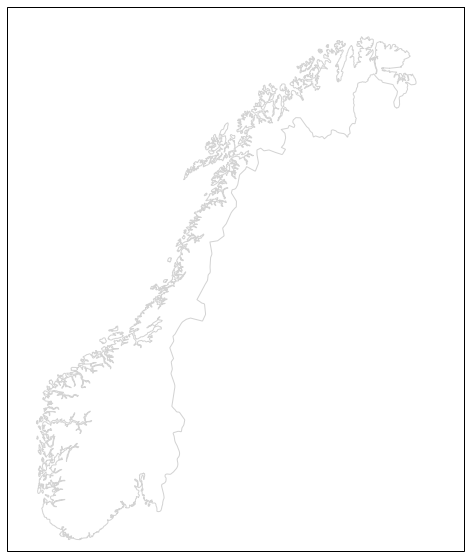

In [39]:
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'
shpfilename = shpreader.natural_earth(resolution, category, name)
# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)
# read the norwegian borders
poly = df.loc[df['ADMIN'] == 'Norway']['geometry'].values[0]
myproj = ccrs.PlateCarree()
mapproj = ccrs.Orthographic(central_longitude=13,central_latitude=63)


geometry = [Point(xy) for xy in zip(data['Lon'], data['Lat'])]
geo_df = geopandas.GeoDataFrame(data, crs=mapproj, geometry=geometry)
#geo_df = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.Lon, data.Lat))
fig = plt.subplots(figsize=[10,10])
ax = plt.subplot(111, projection=mapproj)
ax.add_geometries(poly, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
ax.add_geometries(gdf.geometry, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
ax_extent = [4, 27, 57.5, 72]
ax.set_extent(ax_extent)


Checking if coordinates is added correctly

In [40]:
geo_df

,Stations,Q- trend dir 5%,Q- trend 5%,Q- trend dir 30%,Q- trend 30%,AM30year trend dir,AM30year trend 5%,AM7year trend dir,AM7year trend 5%,AM30summer trend dir,...,Mean SWE trend,Mean SWE,Mean SM trend,Mean SM,Mean E trend,Mean E,Q- spec,Q-95 spec,Q-5 spec,geometry
0,2.13.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,-1.0,271.364320,1.0,58.001339,1.0,0.392531,40.478784,3.092014,140.864343,POINT (8.91856 61.56064)
1,2.32.0,increasing,1,increasing,1,increasing,1,increasing,1,increasing,...,0.0,85.878275,0.0,93.734395,1.0,0.656346,22.063838,3.800582,61.088874,POINT (10.22212 61.85194)
2,2.142.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,0.0,53.060611,0.0,137.502855,1.0,1.167794,15.290250,2.243039,51.579823,POINT (12.04712 60.64117)
3,2.268.0,no trend,0,increasing,1,no trend,0,no trend,0,no trend,...,0.0,225.350191,1.0,63.378361,1.0,0.365685,32.949201,1.210488,123.819025,POINT (8.44722 61.79955)
4,2.279.0,increasing,1,increasing,1,no trend,0,no trend,0,increasing,...,0.0,76.034943,1.0,136.724436,1.0,1.202469,20.517394,2.812165,69.167889,POINT (11.08010 60.13345)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,308.1.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,0.0,169.142100,0.0,98.330120,1.0,0.881928,32.543684,3.309581,122.087129,POINT (13.76031 64.24487)
119,311.4.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,NaN,NaN,NaN,NaN,1.0,0.860267,13.343404,4.790185,32.317266,POINT (11.94004 61.91996)
120,311.460.0,increasing,1,increasing,1,increasing,1,increasing,1,increasing,...,0.0,83.155907,0.0,109.441859,1.0,0.868440,20.793113,4.590006,58.239468,POINT (12.01897 61.66524)
121,313.10.0,no trend,0,no trend,0,no trend,0,no trend,0,no trend,...,0.0,31.181174,0.0,154.597927,1.0,1.268005,14.885473,1.515407,47.417412,POINT (12.18729 59.95464)


Plotting catchment characteristics

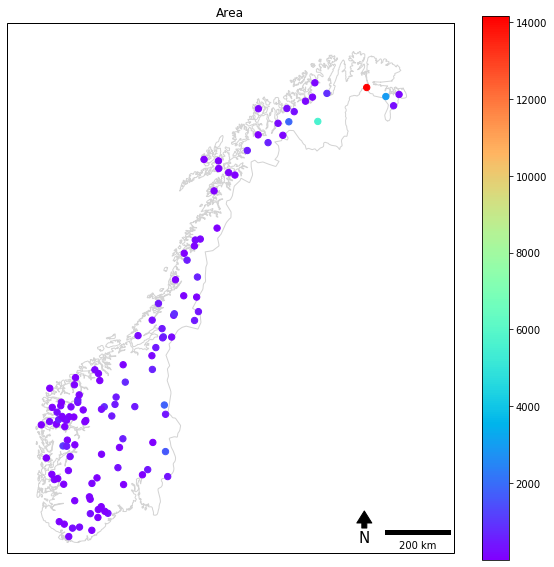

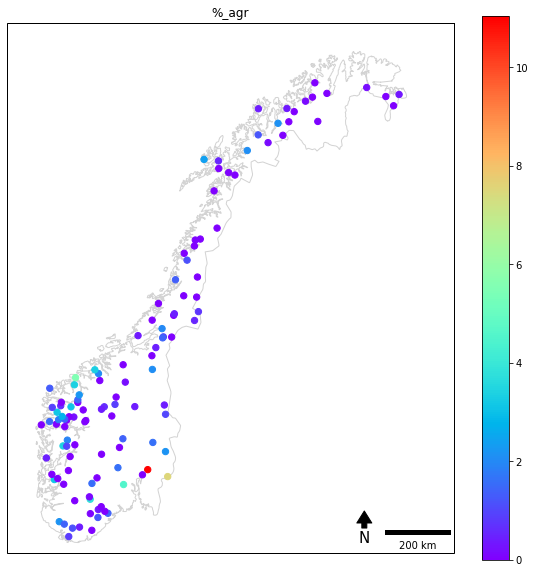

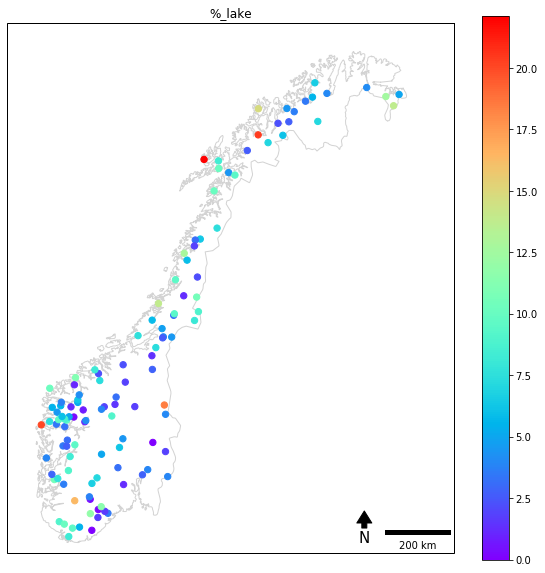

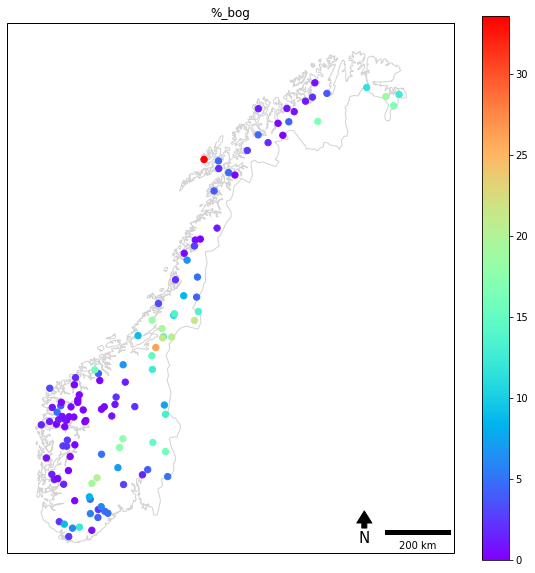

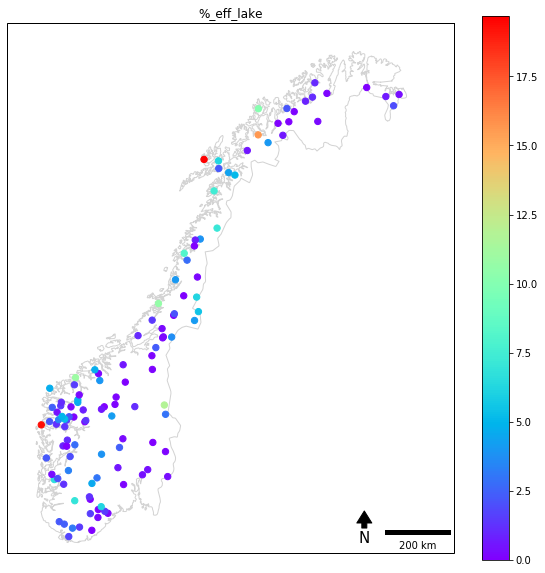

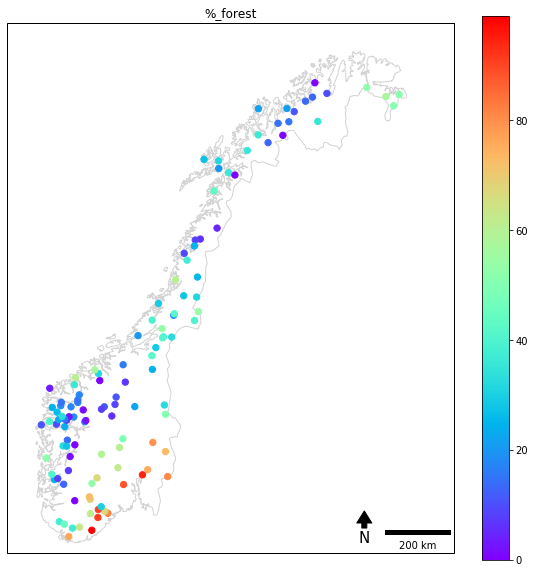

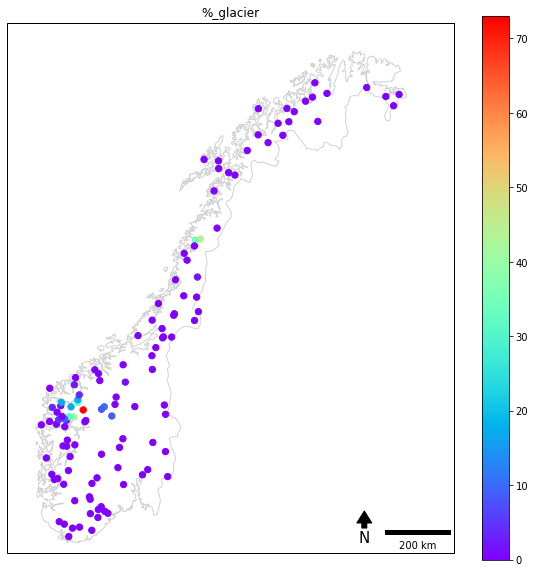

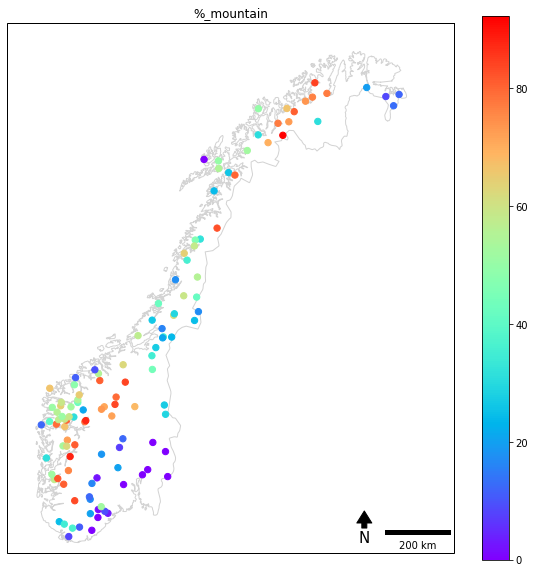

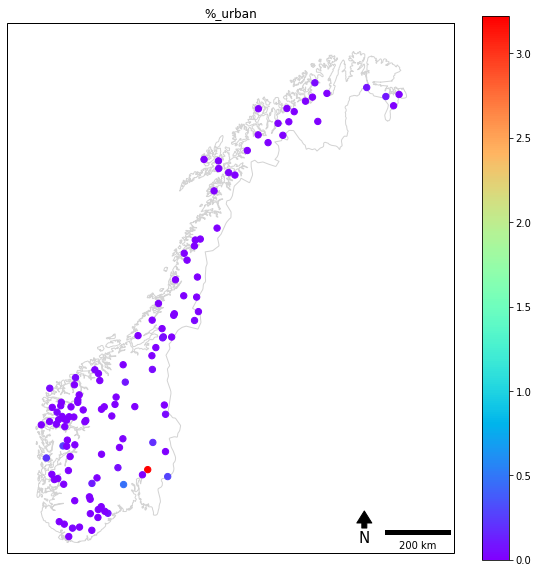

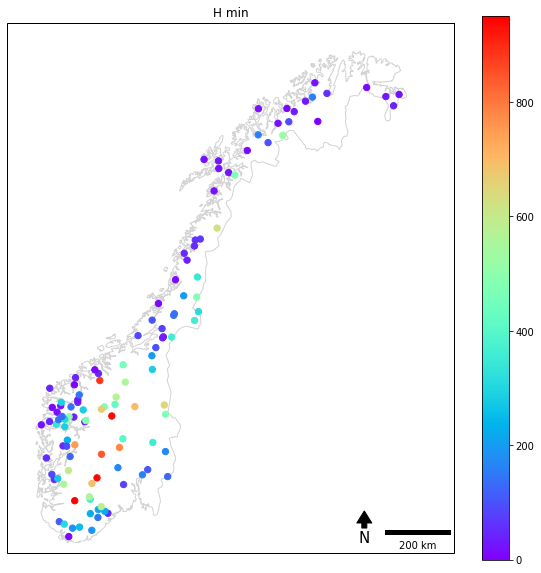

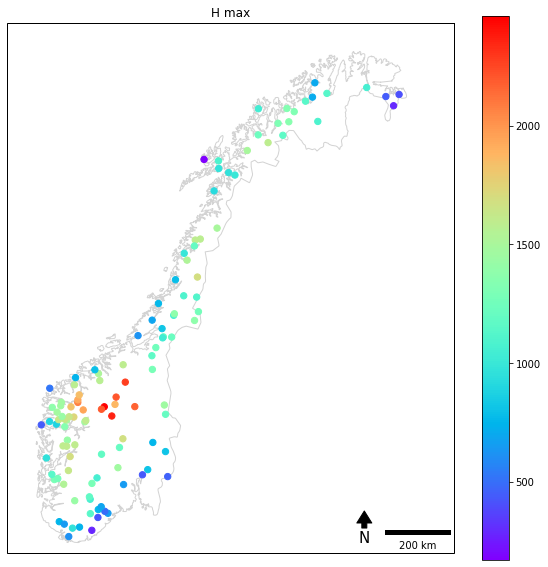

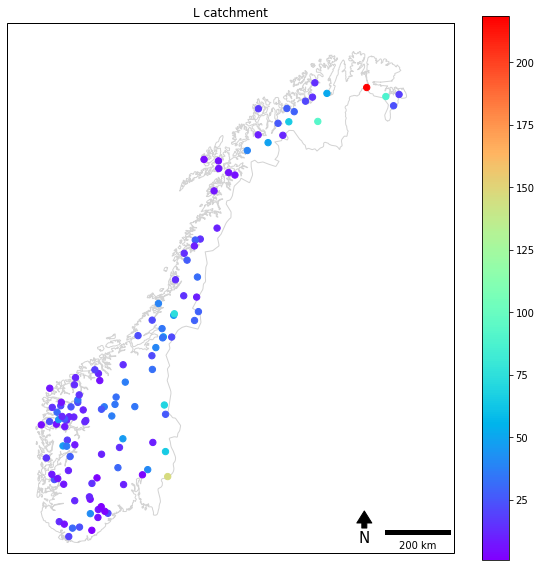

In [42]:
from matplotlib_scalebar.scalebar import ScaleBar
variabs= ['Area', '%_agr','%_lake','%_bog','%_eff_lake','%_forest','%_glacier','%_mountain',
    '%_urban','H min','H max', 'L catchment']
for i in variabs:
    fig = plt.subplots(figsize=[10,10])
    ax = plt.subplot(111, projection=mapproj)
    ax.add_geometries(poly, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
    ax_extent = [4, 27, 57.5, 72]
    ax.set_extent(ax_extent)
    colors = ['#F94144','#F9C74F','#90BE6D','#43AA8B']#,'#577590']#,'#7a0177']
    cmap = c.ListedColormap(colors)

    geo_df.reset_index().plot(geo_df[i], ax=ax, markersize=40, cmap='rainbow', zorder=10, transform=myproj, legend=True)
    #plt.legend(title=i, loc='lower right', borderpad=1)
    plt.title(i)
    x, y, arrow_length = 0.80, 0.08, 0.05
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes);
    scalebar = ScaleBar(1, location='lower right')
    ax.add_artist(scalebar)

    plt.savefig(i+'.png')

Plotting trends

/Users/mac/anaconda3/envs/test/lib/python3.6/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


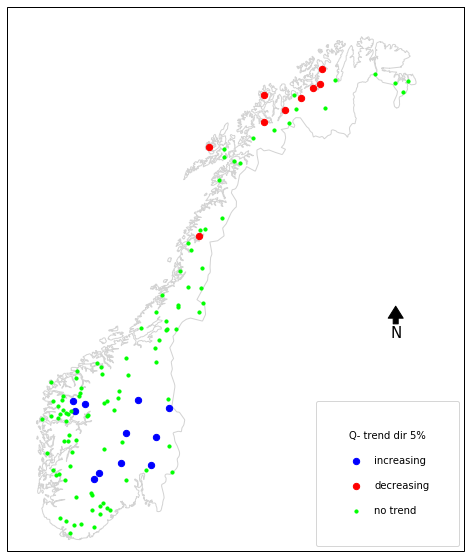

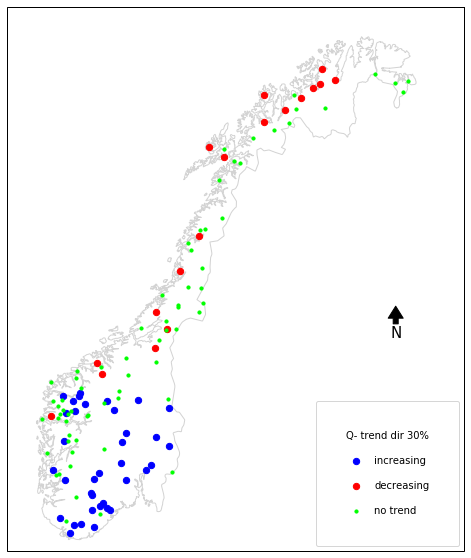

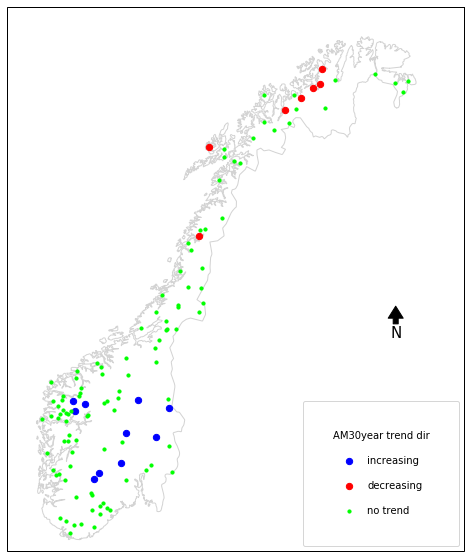

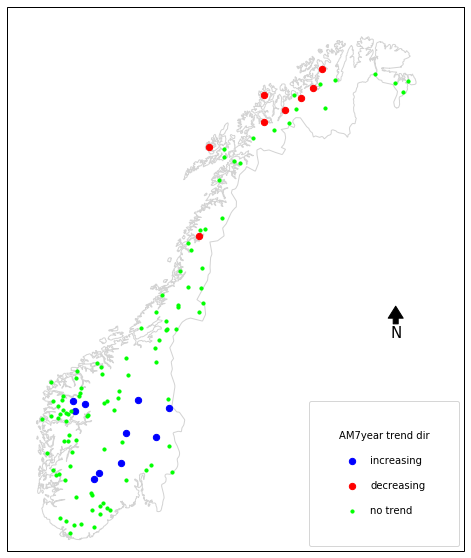

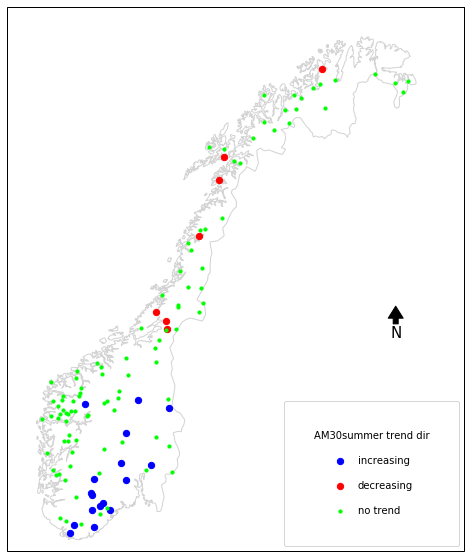

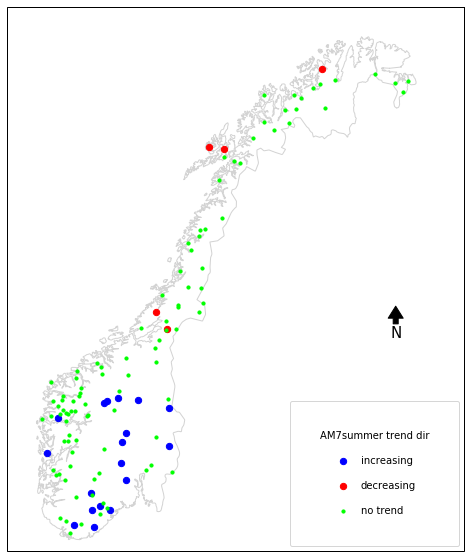

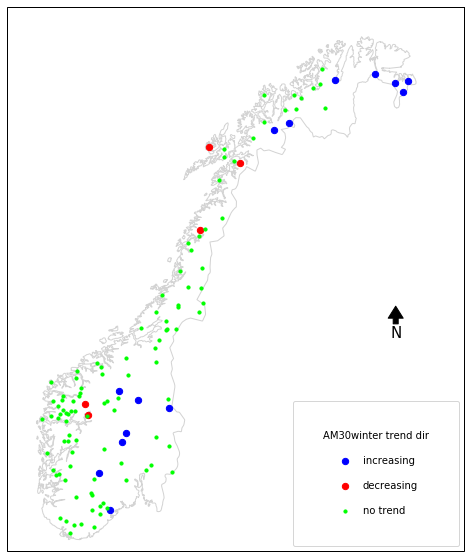

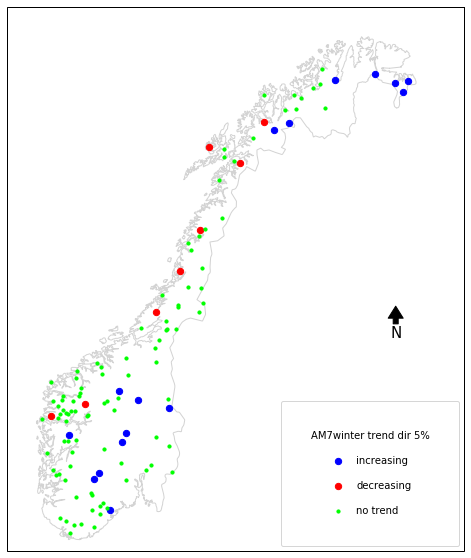

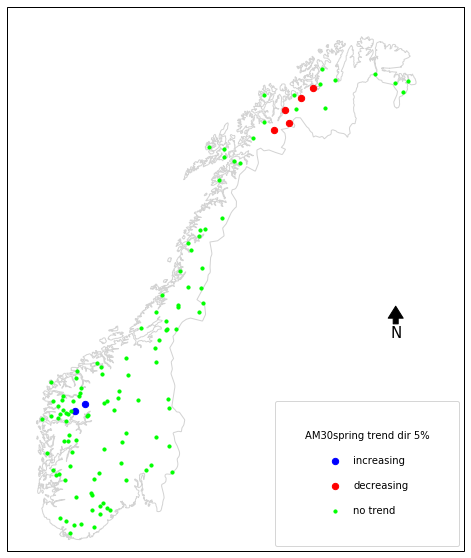

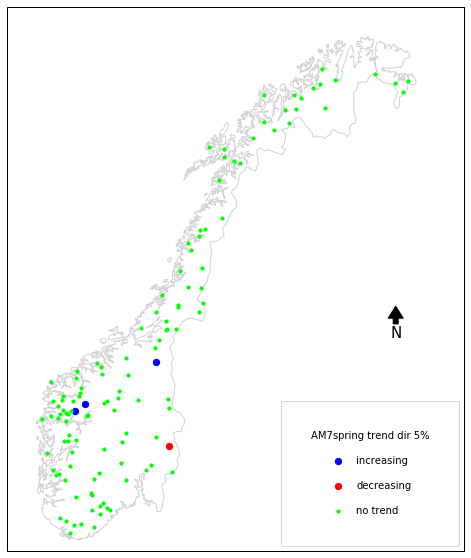

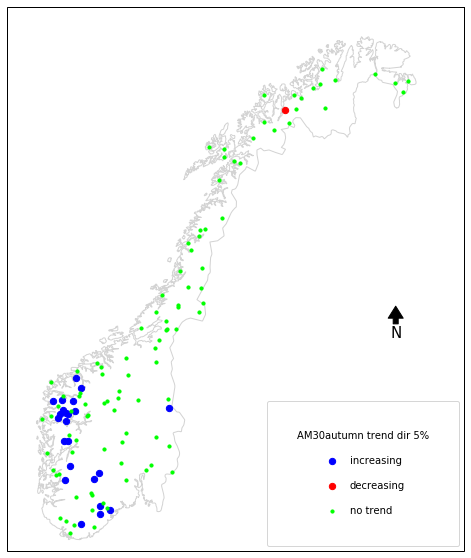

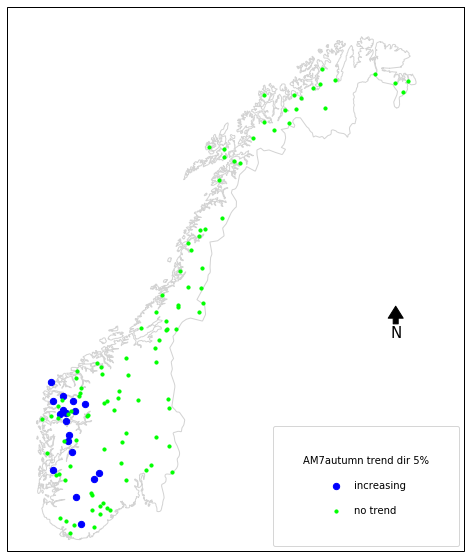

In [46]:
trends = ['Q- trend dir 5%', 'Q- trend dir 30%', 'AM30year trend dir', 'AM7year trend dir', 'AM30summer trend dir', 'AM7summer trend dir','AM30winter trend dir', 
'AM7winter trend dir 5%', 'AM30spring trend dir 5%', 'AM7spring trend dir 5%', 'AM30autumn trend dir 5%', 'AM7autumn trend dir 5%']
for i in trends:
    fig = plt.subplots(figsize=[10,10])
    ax = plt.subplot(111, projection=mapproj)
    ax.add_geometries(poly, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
    ax_extent = [4, 27, 57.5, 72]
    ax.set_extent(ax_extent)

    geo_df[geo_df[i]=='increasing'].plot(ax=ax, markersize=40, color='blue', label='increasing', zorder=10, transform=myproj)
    geo_df[geo_df[i]=='decreasing'].plot(ax=ax, markersize=40, color='red', label='decreasing', zorder=10, transform=myproj)
    geo_df[geo_df[i]=='no trend'].plot(ax=ax, markersize=10, color='#00FF00', label='no trend', zorder=10, transform=myproj)
    #geo_df[geo_df['30drun_summer_MK']==30].plot(ax=ax, markersize=30, color='#7ad7f0', label='Pos 30% trend -- 25', zorder=10, transform=myproj)
    #geo_df[geo_df['30drun_summer_MK']==5].plot(ax=ax, markersize=40, color='blue', label='Pos 5% trend -- 9', zorder=10, transform=myproj)
    plt.legend(title=i, loc='lower right', borderpad=3, labelspacing=1.5)
    x, y, arrow_length = 0.85, 0.45, 0.05
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                arrowprops=dict(facecolor='black', width=5, headwidth=15),
                ha='center', va='center', fontsize=15,
                xycoords=ax.transAxes);
    plt.savefig(i+'.png')

Some trends were calculated for two significance inntervals, so here joining them into one map:

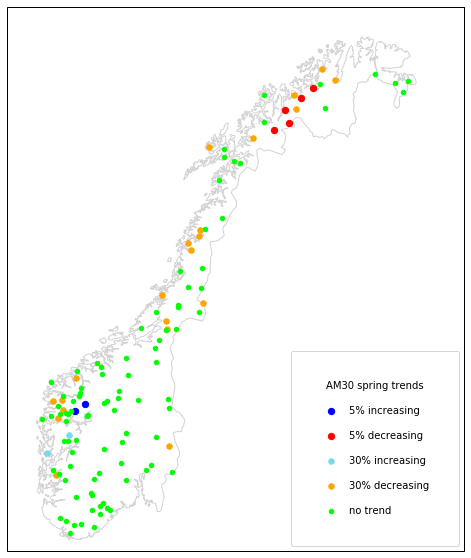

In [ ]:
fig = plt.subplots(figsize=[10,10])
ax = plt.subplot(111, projection=mapproj)
ax.add_geometries(poly, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
ax_extent = [4, 27, 57.5, 72]
ax.set_extent(ax_extent)

geo_df[geo_df['AM30spring trend dir 5%']=='increasing'].plot(ax=ax, markersize=40, color='blue', label='5% increasing', zorder=20, transform=myproj)
geo_df[geo_df['AM30spring trend dir 5%']=='decreasing'].plot(ax=ax, markersize=40, color='red', label='5% decreasing', zorder=20, transform=myproj)
#geo_df[geo_df['AM30spring trend dir 5%']=='no trend'].plot(ax=ax, markersize=20, color='#00FF00', label='spring high no trend', zorder=10, transform=myproj)
geo_df[geo_df['AM30spring trend dir 30%']=='increasing'].plot(ax=ax, markersize=30, color='#7AD7F0', label='30% increasing', zorder=10, transform=myproj)
geo_df[geo_df['AM30spring trend dir 30%']=='decreasing'].plot(ax=ax, markersize=30, color='orange', label='30% decreasing', zorder=10, transform=myproj)
geo_df[geo_df['AM30spring trend dir 30%']=='no trend'].plot(ax=ax, markersize=20, color='#00FF00', label='no trend', zorder=30, transform=myproj)
plt.legend(title='AM30 spring trends', loc='lower right', borderpad=3, labelspacing=1.5)
plt.savefig('AM30_spring_both5&30.png')

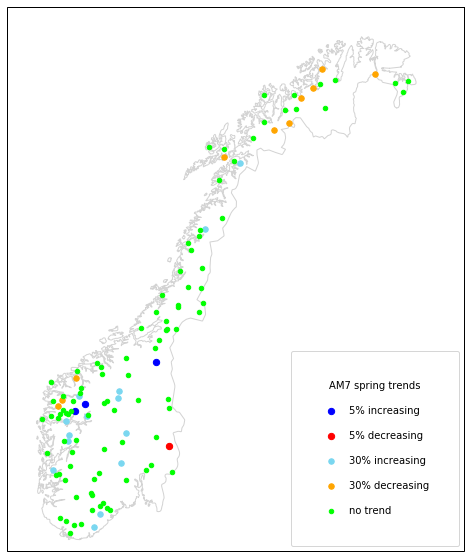

In [ ]:
fig = plt.subplots(figsize=[10,10])
ax = plt.subplot(111, projection=mapproj)
ax.add_geometries(poly, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
ax_extent = [4, 27, 57.5, 72]
ax.set_extent(ax_extent)

geo_df[geo_df['AM7spring trend dir 5%']=='increasing'].plot(ax=ax, markersize=40, color='blue', label='5% increasing', zorder=20, transform=myproj)
geo_df[geo_df['AM7spring trend dir 5%']=='decreasing'].plot(ax=ax, markersize=40, color='red', label='5% decreasing', zorder=20, transform=myproj)
#geo_df[geo_df['AM30spring trend dir 5%']=='no trend'].plot(ax=ax, markersize=20, color='#00FF00', label='spring high no trend', zorder=10, transform=myproj)
geo_df[geo_df['AM7spring trend dir 30%']=='increasing'].plot(ax=ax, markersize=30, color='#7AD7F0', label='30% increasing', zorder=10, transform=myproj)
geo_df[geo_df['AM7spring trend dir 30%']=='decreasing'].plot(ax=ax, markersize=30, color='orange', label='30% decreasing', zorder=10, transform=myproj)
geo_df[geo_df['AM7spring trend dir 30%']=='no trend'].plot(ax=ax, markersize=20, color='#00FF00', label='no trend', zorder=30, transform=myproj)
plt.legend(title='AM7 spring trends', loc='lower right', borderpad=3, labelspacing=1.5)
plt.savefig('AM7_spring_both5&30.png')

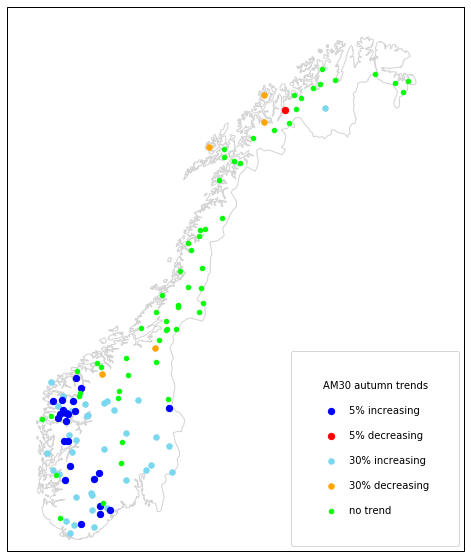

In [ ]:
fig = plt.subplots(figsize=[10,10])
ax = plt.subplot(111, projection=mapproj)
ax.add_geometries(poly, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
ax_extent = [4, 27, 57.5, 72]
ax.set_extent(ax_extent)

geo_df[geo_df['AM30autumn trend dir 5%']=='increasing'].plot(ax=ax, markersize=40, color='blue', label='5% increasing', zorder=20, transform=myproj)
geo_df[geo_df['AM30autumn trend dir 5%']=='decreasing'].plot(ax=ax, markersize=40, color='red', label='5% decreasing', zorder=20, transform=myproj)
#geo_df[geo_df['AM30autumn trend dir 5%']=='no trend'].plot(ax=ax, markersize=20, color='#00FF00', label='autumn high no trend', zorder=10, transform=myproj)
geo_df[geo_df['AM30autumn trend dir 30%']=='increasing'].plot(ax=ax, markersize=30, color='#7AD7F0', label='30% increasing', zorder=10, transform=myproj)
geo_df[geo_df['AM30autumn trend dir 30%']=='decreasing'].plot(ax=ax, markersize=30, color='orange', label='30% decreasing', zorder=10, transform=myproj)
geo_df[geo_df['AM30autumn trend dir 30%']=='no trend'].plot(ax=ax, markersize=20, color='#00FF00', label='no trend', zorder=30, transform=myproj)
plt.legend(title='AM30 autumn trends', loc='lower right', borderpad=3, labelspacing=1.5)
plt.savefig('AM30_autumn_both5&30.png')

/Users/mac/anaconda3/envs/test/lib/python3.6/site-packages/geopandas/plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


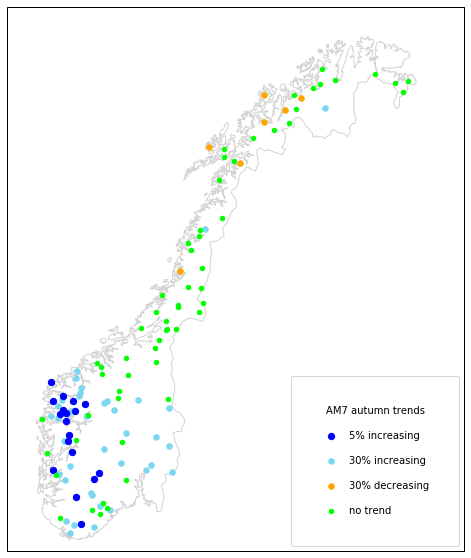

In [ ]:
fig = plt.subplots(figsize=[10,10])
ax = plt.subplot(111, projection=mapproj)
ax.add_geometries(poly, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
ax_extent = [4, 27, 57.5, 72]
ax.set_extent(ax_extent)

geo_df[geo_df['AM7autumn trend dir 5%']=='increasing'].plot(ax=ax, markersize=40, color='blue', label='5% increasing', zorder=20, transform=myproj)
geo_df[geo_df['AM7autumn trend dir 5%']=='decreasing'].plot(ax=ax, markersize=40, color='red', label='5% decreasing', zorder=20, transform=myproj)
#geo_df[geo_df['AM30autumn trend dir 5%']=='no trend'].plot(ax=ax, markersize=20, color='#00FF00', label='autumn high no trend', zorder=10, transform=myproj)
geo_df[geo_df['AM7autumn trend dir 30%']=='increasing'].plot(ax=ax, markersize=30, color='#7AD7F0', label='30% increasing', zorder=10, transform=myproj)
geo_df[geo_df['AM7autumn trend dir 30%']=='decreasing'].plot(ax=ax, markersize=30, color='orange', label='30% decreasing', zorder=10, transform=myproj)
geo_df[geo_df['AM7autumn trend dir 30%']=='no trend'].plot(ax=ax, markersize=20, color='#00FF00', label='no trend', zorder=30, transform=myproj)
plt.legend(title='AM7 autumn trends', loc='lower right', borderpad=3, labelspacing=1.5)
plt.savefig('AM7_autumn_both5&30.png')

Plotting climate indices

In [ ]:
from matplotlib_scalebar.scalebar import ScaleBar
variabs= ['Mean E', 'Mean SWE', 'Mean SM','Mean SD max', 'T-', 'P-']
for i in variabs:
    fig = plt.subplots(figsize=[10,10])
    ax = plt.subplot(111, projection=mapproj)
    ax.add_geometries(poly, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
    ax_extent = [4, 27, 57.5, 72]
    ax.set_extent(ax_extent)
    colors = ['#F94144','#F9C74F','#90BE6D','#43AA8B']#,'#577590']#,'#7a0177']
    cmap = c.ListedColormap(colors)

    geo_df.reset_index().plot(geo_df[i], ax=ax, markersize=40, cmap='rainbow', zorder=10, transform=myproj, legend=True)
    ax.add_geometries(gdf.geometry, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
    #plt.legend(title=i, loc='lower right', borderpad=1)
    plt.title(i)
    x, y, arrow_length = 0.80, 0.08, 0.05
    ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes);
    scalebar = ScaleBar(1, location='lower right')
    ax.add_artist(scalebar)

    plt.savefig(i+'.png')

And their corresponding trends

In [ ]:
trends = ['Mean E trend', 'Mean SWE trend', 'Mean SM trend', 'SD max trend', 'T- trend', 'P- trend']
for i in trends:
    fig = plt.subplots(figsize=[10,10])
    ax = plt.subplot(111, projection=mapproj)
    ax.add_geometries(poly, crs=myproj, facecolor='none', edgecolor='#B8B8B8')
    ax_extent = [4, 27, 57.5, 72]
    ax.set_extent(ax_extent)

    geo_df[geo_df[i]==1].plot(ax=ax, markersize=40, color='blue', label='Increasing', zorder=10, transform=myproj)
    geo_df[geo_df[i]==-1].plot(ax=ax, markersize=40, color='red', label='Decreasing', zorder=10, transform=myproj)
    geo_df[geo_df[i]==0].plot(ax=ax, markersize=10, color='#00FF00', label='No trend', zorder=10, transform=myproj)
    ax.add_geometries(gdf.geometry, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
    #geo_df[geo_df['30drun_summer_MK']==30].plot(ax=ax, markersize=30, color='#7ad7f0', label='Pos 30% trend -- 25', zorder=10, transform=myproj)
    #geo_df[geo_df['30drun_summer_MK']==5].plot(ax=ax, markersize=40, color='blue', label='Pos 5% trend -- 9', zorder=10, transform=myproj)
    plt.legend(title=i, loc='lower right', borderpad=3, labelspacing=1.5)
    plt.savefig(i+'.png')